<h1>Chapter 3 | Data Exercise #3 | Measuring home team advantage | EDA</h1>
<h2>Introduction:</h2>
<p>In this notebook, you will find my notes and code for Chapter 3's <b>exercise 3</b> of the book <a href="https://gabors-data-analysis.com/">Data Analysis for Business, Economics, and Policy</a>, by Gábor Békés and Gábor Kézdi. The question was: 
<p>3. Pick another season from <code>football</code>.</p>
<p>Assignments:</p>
<ul>
    <li>Examine the extent of home team advantage in ways similar to our case study.</li>
    <li>Compare the results and discuss what you find.</li>
</ul>
<h2><b>1.</b> Load the data</h2>

In [36]:
import os
import sys
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from plotnine import *
from mizani.formatters import percent_format

warnings.filterwarnings("ignore")
%matplotlib inline

In [37]:
# Increase number of returned rows in pandas
pd.set_option("display.max_rows", 500)

In [38]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_data_exercises")[0]

# Get location folders
data_in = f"{dirname}da_data_repo/football/clean/"
data_out = f"{dirname}da_data_exercises/ch03-exploratory_data_analysis/03-football_home_adv_EDA/data/clean/"
output = f"{dirname}da_data_exercises/ch03-exploratory_data_analysis/03-football_home_adv_EDA/"
func = f"{dirname}da_case_studies/ch00-tech_prep/"
sys.path.append(func)

In [39]:
from py_helper_functions import *

In [40]:
df = pd.read_csv(f"{data_in}epl_games.csv")

In [41]:
df.head()

,div,season,date,team_home,team_away,points_home,points_away,goals_home,goals_away
0,E0,2008,16aug2008,Arsenal,West Brom,3,0,1,0
1,E0,2008,16aug2008,West Ham,Wigan,3,0,2,1
2,E0,2008,16aug2008,Middlesbrough,Tottenham,3,0,2,1
3,E0,2008,16aug2008,Everton,Blackburn,0,3,2,3
4,E0,2008,16aug2008,Bolton,Stoke,3,0,3,1


<h2><b>2</b>. EDA</h2>
<h3>2.1 Pick a different season</h3>
<p>Let's choose a different season. First, let's see the available seasons in this dataset.</p>

In [42]:
df["season"].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
      dtype=int64)

<p>Let's choose the latest season, 2017/2018.</p>

In [43]:
football_2017 = df.loc[df["season"] == 2017, :].reset_index(drop=True)

In [44]:
football_2017.shape

(380, 9)

<p>We can create a <code>football_2016</code> that will represent the same data as the book's. We need to compare the number of matches to see if we got our data right.</p>

In [45]:
football_2016 = df.loc[df["season"] == 2016, :].reset_index(drop=True)

In [46]:
football_2016.shape

(380, 9)

<h3>2.2 Examine the extent of home team advantage in ways similar to our case study</h3>
<p>Let's create a function that creates the variable <code>"home_goaladv"</code> and another that creates a table with the statistics that we need.</p>

In [47]:
def home_goal_adv(data):
    """Return the difference between home and away goals for each match and measures home goal advantage."""
    data["home_goaladv"] = data["goals_home"] - data["goals_away"]
    return data["home_goaladv"]


def summary_stats(data):
    """Return summary statistics of a dataset."""
    return pd.DataFrame.from_dict(
        {
            "Statistics": [
                "Mean",
                "Standard deviation",
                "Percent positive",
                "Percent zero",
                "Percent negative",
                "Number of observations",
            ],
            "Value": [
                data["home_goaladv"].describe()["mean"],
                data["home_goaladv"].describe()["std"],
                (data["home_goaladv"] > 0).sum() / data["home_goaladv"].shape[0] * 100,
                (data["home_goaladv"] == 0).sum() / data["home_goaladv"].shape[0] * 100,
                (data["home_goaladv"] < 0).sum() / data["home_goaladv"].shape[0] * 100,
                data["home_goaladv"].describe()["count"],
            ],
        }
        ).round(1)


<p>We can now create our summary statistics table for season 2017/2018 and observe comment the results.</p>

In [48]:
football_2017["home_goaladv"] = home_goal_adv(football_2017)

In [49]:
summary_2017 = summary_stats(football_2017)
summary_2017

,Statistics,Value
0,Mean,0.4
1,Standard deviation,1.9
2,Percent positive,45.5
3,Percent zero,26.1
4,Percent negative,28.4
5,Number of observations,380.0


<p>In the season 2017/2018, teams playing at home displayed a clear home goal advantage. The mean is <b>0.4</b>, which means that the home team enjoys an advantage in terms of the number of goals it scores per match - for every match, they are likely to have a 0.4 goal advantage. For every three games, they have a 1.2 goal difference. The standard deviation is 1.9, which means that the result can deviate from the mean in such a value. This is a significant observation, as, for each match, we can expect some dispersion from the 0.4 home goal advantage.</p>
<p>In terms of actual wins, draws, or losses, the home team tends to win more games at home. The proportion of victories is <b>45.5%</b>, which means that they win nearly half of all matches at home. With draws at a <b>26.1%</b>, the home team is expected to score points in <b>71.6%</b> of all season matches. Finally, they lost in <b>28.4%</b> of the matches. Thus, we can confirm that, in season 2017/2018, the home team enjoyed a favorable scenario.</p>
<p>We can now plot a histogram with the distribution of goal difference and observe the results.</p>

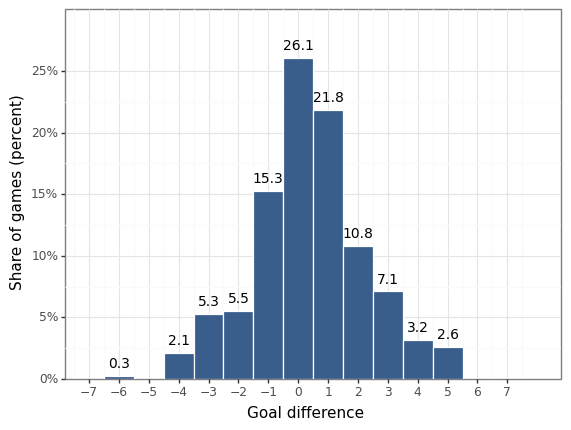

<ggplot: (166211285098)>

In [53]:
ggplot(football_2017, aes(x="home_goaladv", y="stat(count)/sum(stat(count))")) + geom_histogram(
    fill=color[0], color="white", binwidth=1,
) + geom_text(
    aes(label="[round(x,1) for x in stat(count)/sum(stat(count))*100]"),
    stat="count",
    size=10,
    nudge_y=0.01,
) + labs(
    x="Goal difference", y="Share of games (percent)"
) + scale_x_continuous(
    expand=(0.05, 0.05), limits=(-7, 8), breaks=seq(-7, 8, by=1)
) + scale_y_continuous(
    expand=(0, 0),
    limits=(0, 0.30),
    breaks=seq(0, 0.30, by=0.05),
    labels=percent_format(),
) + theme_bw()

<p>Visualizing the home team goal difference helps us understand their home advantage. We can see that the mode is <b>0</b>, which means that if we were to take the results by their goal differemce and not to group them by victories or draws or losses, the most frequent outcome would be a draw. But we are interested in the actual results, and not only on goal difference. As such, we can see that there are more observations on the positive side of the histogram.  A 1-goal difference is 21.8%, while a -1 difference is 15.3%. For wins with a 2-goal difference, the difference is even wider - 10.8% and 5.5%. For higher goal differences, we tend to get a decreased number of observations, but always in favor of the home team (except for an interesting extreme value of -6, which represented 0.3% of the results vs none for a positive 6-goal difference). To conclude, the home team displayed a clear advantage in terms of goal difference as well.</p>
<h3>2.2 Compare the results and discuss what you find.</h3>
<p>We can now create the table for season 2016/2017 and compare the results.</p>


In [55]:
football_2016["home_goaladv"] = home_goal_adv(football_2016)

summary_2016 = summary_stats(football_2016)
summary_2016

,Statistics,Value
0,Mean,0.4
1,Standard deviation,1.9
2,Percent positive,49.2
3,Percent zero,22.1
4,Percent negative,28.7
5,Number of observations,380.0


In [61]:
pd.merge(summary_2016, summary_2017, on="Statistics", how="inner", suffixes=("_2016", "_2017"))

,Statistics,Value_2016,Value_2017
0,Mean,0.4,0.4
1,Standard deviation,1.9,1.9
2,Percent positive,49.2,45.5
3,Percent zero,22.1,26.1
4,Percent negative,28.7,28.4
5,Number of observations,380.0,380.0


<p>We can make some observations here.</p>
<ul>
<li>In both seasons, the home team advantage in terms of the goal difference remained the same for the mean, which did not change (0.4).